# Исследование продаж видеоигр за 1980 - 2016 г.г.


Исследование проводится для интернет-магазина, который продаёт видеоигры по всему миру. Данные для исследования получены из открытых источников - доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

---
**Цель исследования:** выявить определяющие успешность игры закономерности, учитывая при этом предпочтения пользователей из разных регионов. Опираясь на результаты исследвания предложить рекомендации для  рекламной компании на 2017 год.

---
**План исследования:**
1. Изучение исходных данных  


2. Предобработка данных
    - Обработка пропусков
    - Исправление форматов данных
    
    
3. Исследовательский анализ данных
    - Изучение динамики продаж игр
    - Изучение популярности игровых платформ
    - Определение актуального периода для составления прогноза на 2017 год
    - Изучение влияния оценок пользователей и критиков на продажи игр
    - Изучение популярности жанров
    
    
4. Изучение предпочтений пользователей каждого региона (NA, EU, JP)
    - Изучение предпочтений по платформам
    - Изучение предпочтений по жанрам
    - Изучение предпочтений по возрастному рейтингу
    
    
5. Проверка гипотез


6. Составление общего вывода

---
**Описание данных:**

`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

---

## Изучение исходных данных

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
sns.set_style("darkgrid")

In [60]:
games_data = pd.read_csv('/datasets/games.csv')
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [61]:
games_data.info() # изучаем столбцы и их тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [62]:
# проверка на количество пропусков и их долю
(games_data.isna().agg(func=('sum', 'mean')).round(2).T
.sort_values(by='sum', ascending=False))

,sum,mean
Critic_Score,8578.0,0.51
Rating,6766.0,0.40
User_Score,6701.0,0.40
Year_of_Release,269.0,0.02
Name,2.0,0.00
Genre,2.0,0.00
Platform,0.0,0.00
NA_sales,0.0,0.00
EU_sales,0.0,0.00
JP_sales,0.0,0.00


Большинство пропусков в столбцах с оценками игр:  Critic_Score - 51%, User_Score - 40%.  
И столбец с возрастным рейтингом Rating - 40%,

In [63]:
games_data.duplicated().sum() # проверка на полные дубликаты

0

In [64]:
games_data.describe() # описательная статистика по столбцам

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


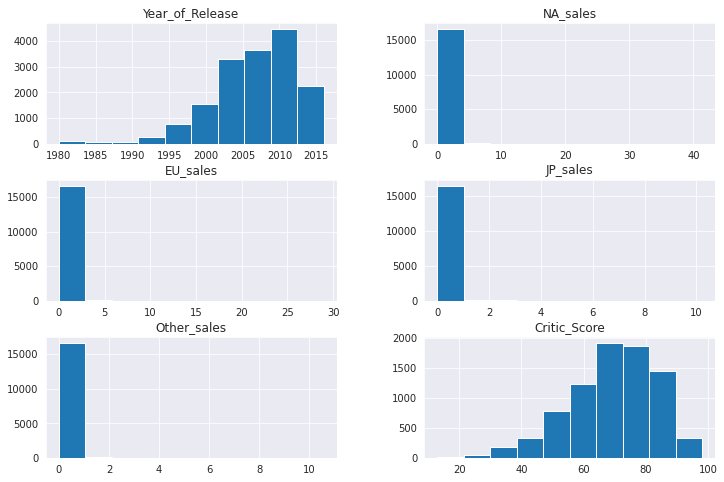

In [65]:
games_data.hist(figsize=(12, 8)); # изучаем распредение значений 

Из описательной статистики и гистограмм можно сделать следующие выводы:  
- Временной период продаж игр для исследования с 1980 по 2016 г.г.
- Большинство игр было выпущено с 2003 по 2012 годы
- В столбцах с данными о продажах видно, что есть аномально высокие значения, находящиеся очень далеко от медианы и средней.
- Диапозон оценок критиков от 13 до 98 баллов. Чаще всего игры оценивали в диапозоне 60-80 баллов.

---

## Предобработка данных

In [66]:
games_data.columns = games_data.columns.str.lower() # приводим названия столбцов в змеиный регистр
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Столбец 'name'**

In [67]:
games_data[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [68]:
games_data = games_data.dropna(subset=['name']) # удаляем строки с пропущенным названием игры

**Столбец 'year_of_release'**

In [69]:
# проверка доли игр без указанного года выпуска в продажах для каждого региона
for sales in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    print("{:.2%}".format((games_data[games_data['year_of_release'].isna()][sales].sum()/games_data[sales].sum())))

1.34%
1.01%
0.52%
1.09%


Доля таких игр в выручке незначительна - их можно удалить.

In [70]:
games_data = (games_data.dropna(subset=['year_of_release']) # удаление строк с отсутвующим годом выпуска
.reset_index(drop=True)) # сброс индексов

In [71]:
# Замена float на int для столбца год выпуска
games_data['year_of_release'] = games_data['year_of_release'].astype(int) 

**Столбец 'critic_score'**

In [72]:
games_data['critic_score'].unique() # все ок

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

**Столбец 'user_score'**

In [73]:
games_data['user_score'].unique() # рассмотрим уникальные значения 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

- числовые значения имеют формат формат str (необходимо перевести в float формат)
- 2376 значений 'tbd'

Постараемся понять, что может означать 'tbd' - рассмотрим строки с таким значением и все остальные и сравним их. Возможно в числовых данных будут определенные закономерности (например сильно отличаться год выпуска, уровень продаж, оценки критиков)

In [74]:
games_data.query('user_score == "tbd"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,1056.000000
mean,2007.450337,0.125539,0.043674,0.002782,0.015905,60.766098
std,3.484229,0.176593,0.112068,0.026395,0.039411,11.190603
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.070000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


In [75]:
games_data.query('user_score != "tbd"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,6927.000000
mean,2006.323429,0.287400,0.163201,0.091273,0.052946,70.248737
std,6.174107,0.879667,0.544008,0.334487,0.202128,13.868657
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,62.000000
50%,2007.000000,0.080000,0.030000,0.000000,0.010000,72.000000
75%,2011.000000,0.260000,0.130000,0.050000,0.040000,80.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Строки с 'tbd' в среднем имеют меньшие продажи и более низкую оценку критиков, но никаких значительных различий между строками c 'tbd' и остальными не выявленно. Как правило аббривиатура 'TBD' означает 'to be decided', т.е. оценка "еще не определена".  
Возможно оценок пользователей слишком мало для формирования оценки, либо данные просто отсутствуют.  
В таком случае стоить заменить значения 'tbd' на 'nan'.

In [76]:
# перевод чисел в формате str в float и 'tbd' в nan
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce') 

**Столбец 'rating'**

In [77]:
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [78]:
games_data['rating'] = games_data['rating'].fillna('no_rating') # заполним nan обозначением 'no_rating'

**Заполнение пропусков:**  
- Пропуски в 'name' и 'year_of_release' удалены, поскольку количество таких строк незначительно.
- Пропусков в 'critic_score' и 'user_score' очень много - их доли 50% и 40% от всех данных. Заполнить их средним по имеющимся половинам данных представляется некорректным, поэтому остается оставить их как есть.
- Пропуски в 'rating' тоже занимают значительную долю - 40%. Поскольку значения категориальные, можно лишь заменить 'nan' на обозначение отстутвия возрастного рейтинга ('no_rating').


In [79]:
games_data.info() # пропуски обработаны, типы данных исправлены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [80]:
# Расчитаем общие продажи по всем регионам и добавим их в новый столбец
games_data['total_sales'] = games_data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Исследовательский анализ данных

### Динамика выпуска игр за период 1980 - 2016 г.г.

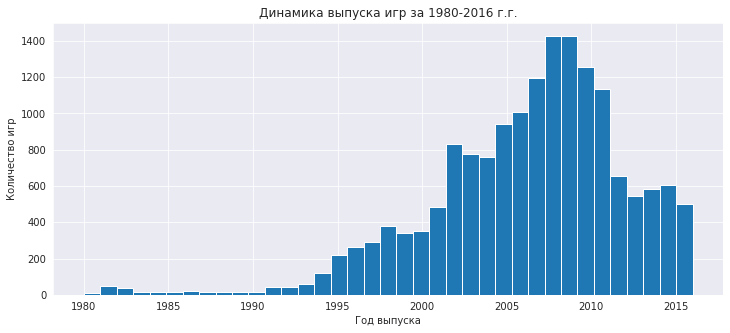

In [81]:
games_data["year_of_release"].hist(bins=37, figsize=(12, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Динамика выпуска игр за 1980-2016 г.г.')
plt.show()

- Количество выпускаемых игр до 1995 года составляло меньше 200 в год, а до 2001 меньше 400.
- Пик по количеству выпущенных игр пришелся на 2008, 2009 года - около 1400 игр в год.
- После 2009 года выпуск игр пошел на спад, в 2016 году было выпущено только около 500 игр.

Наиболее релевантные данные для планирования рекламной компании на 2017 год - период с 2012 по 2016, т.к. этот период имеет другую динамку (плато), до этого наблюдался активный рост, бум и резкое падение.  
Для краткосрочного планирования (только на один следующий год) подойдут два последних года - 2015 и 2016.

---

### Динамика продаж игр по платформам

In [82]:
# Находим Топ 10 платформ по общей выручке 
top10_platforms = games_data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).head(10)
# Отбираем данные только для этих 10 платформ
top10_platforms_data = games_data.query('platform in @top10_platforms.index')

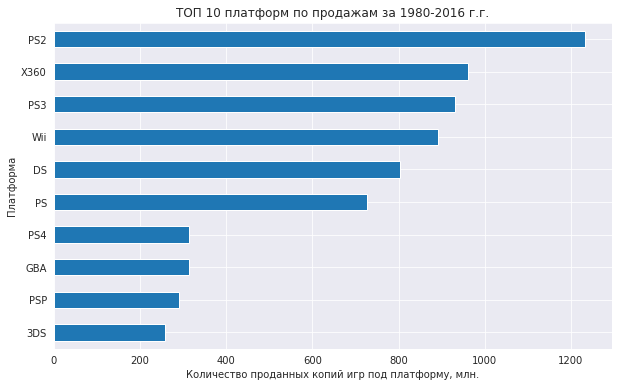

In [83]:
top10_platforms.sort_values(ascending=True).plot(kind='barh', title='ТОП 10 платформ по продажам за 1980-2016 г.г.',figsize = (10,6))
plt.xlabel('Количество проданных копий игр под платформу, млн.')
plt.ylabel('Платформа')
plt.show()

- Самой успешной платформой за весь период является **PlayStation 2** - около 1.2 млрд. проданных копий игр. Платформа была активна в период с 2000 по 2010 год и лидировала на рынке в первой половине двухтысячных. 
- Главный конкурент Playstation - платформы от XBox. Самый успешный представитель - **X360** c продажами 961 млн. копий игр. Платформа была активна в период с 2005 по 2015 год
- Третий сильный игрок на рынке - платформы от Nintendo (Япония). Их **приставки Wii** и **портативные консоли DS** (самая успешная среди портативных устройств) занимают 4 и 5 место в рейтинге, с продажами 891 млн. и 802 млн. соответственно.

In [84]:
# вспомогательный pivot для построения графика по продажам игр по топ 10 платформ
platforms_pivot = top10_platforms_data.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')

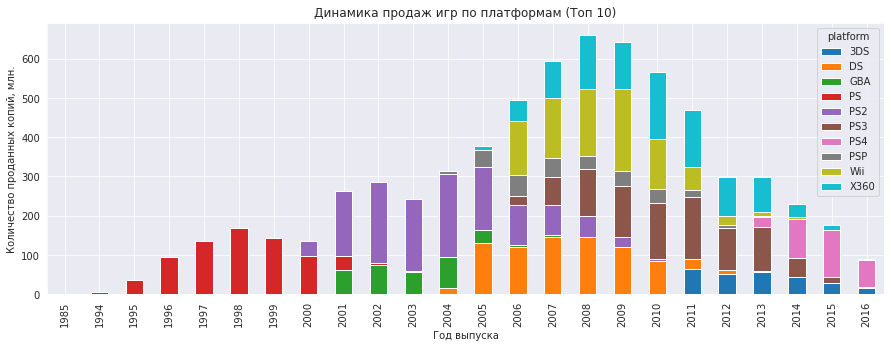

In [85]:
platforms_pivot.plot(kind='bar', figsize = (15,5), stacked=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн.')
plt.title('Динамика продаж игр по платформам (Топ 10)')
plt.show()

- До 2000 года главной игровой платформой являлась PlayStation 1(PS), затем ее сменила PS2 и до 2006 года так же удерживала лидерство, с выпуском PS3 в 2006 году - позиции Playstation значительно сократились, но с 2014 года они снова выбиваются в лидеры c выпуском PS4.
- В период с 2006 по 2011 (бум по количеству выпущеннных игр) рынок платформ имел много сильных и относительно равных игроков.

In [86]:
# расчитаем год выпуска первой и последней игры для каждой платформы
platform_lifetime = games_data.groupby('platform')['year_of_release'].agg(['min','max'])
# расчитаем продолжительность жизни каждой платформы
platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min']
# вывод таблицу на экран
display(platform_lifetime.sort_values(by='min'))

,min,max,lifetime
platform,,,
2600,1980,1989,9
NES,1983,1994,11
DS,1985,2013,28
PC,1985,2016,31
GB,1988,2001,13
SNES,1990,1999,9
GEN,1990,1994,4
GG,1992,1992,0
SCD,1993,1994,1


Для расчета средней продолжительности жизни платформы некорректно брать максимальный год выпуска - 2016, т.к. возможно платформы еще активны и игры под них будут выходить в последующих годах. 

In [87]:
print('Средняя продолжительность жизни среди устаревших платформ: ',
      platform_lifetime.query('max != 2016')['lifetime'].mean(), 'лет')

Средняя продолжительность жизни среди устаревших платформ:  7.0 лет


In [88]:
# расчитаем год выпуска первой и последней игры для каждой платформы
top10_platform_lifetime = top10_platforms_data.groupby('platform')['year_of_release'].agg(['min','max'])
# расчитаем продолжительность жизни каждой платформы
top10_platform_lifetime['lifetime'] = top10_platform_lifetime['max'] - top10_platform_lifetime['min']

In [89]:
top10_platform_lifetime

,min,max,lifetime
platform,,,
3DS,2011,2016,5
DS,1985,2013,28
GBA,2000,2007,7
PS,1994,2003,9
PS2,2000,2011,11
PS3,2006,2016,10
PS4,2013,2016,3
PSP,2004,2015,11
Wii,2006,2016,10


Если не считать недавно выпущенные платформы и платформу DS (с аномальным значением 28 лет), то средняя продолжительность жизни топ платформ - **около 10 лет**

**Расчет периодичности выпуска новых и закрытия старых платформ:**

In [90]:
platform_launch = platform_lifetime['min'].sort_values().unique() # годы в которые выпускалась хотябы одна новая платформа
display('Годы выпуска', platform_launch)
platform_shutdown = platform_lifetime['max'].sort_values().unique() # годы в которые закрывалась хотябы одна старая платформа
display('Годы закрытия', platform_shutdown)

'Годы выпуска'

array([1980, 1983, 1985, 1988, 1990, 1992, 1993, 1994, 1995, 1996, 1998,
       1999, 2000, 2001, 2004, 2005, 2006, 2011, 2012, 2013])

'Годы закрытия'

array([1989, 1992, 1994, 1995, 1996, 1999, 2001, 2002, 2003, 2007, 2008,
       2011, 2013, 2015, 2016])

In [91]:
launch_diff = []
for x in range(len(platform_launch)-1):
    launch_diff.append(platform_launch[x+1] - platform_launch[x])
print('Промежуток (в годах) между появлением новой платформы:', launch_diff)

shutdown_diff = []
for x in range(len(platform_shutdown)-1):
    shutdown_diff.append(platform_shutdown[x+1] - platform_shutdown[x])
print('Промежуток (в годах) между закрытием старой платформы:', shutdown_diff)

Промежуток (в годах) между появлением новой платформы: [3, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 5, 1, 1]
Промежуток (в годах) между закрытием старой платформы: [3, 2, 1, 1, 3, 2, 1, 1, 4, 1, 3, 2, 2, 1]


In [92]:
print('Характерный срок появления хотя бы одной новой платформы: каждые', (sum(launch_diff)/len(launch_diff)).round(1), 'года')
print('Характерный срок закрытия хотя бы одной старой платформы: каждые', (sum(shutdown_diff)/len(shutdown_diff)).round(1), 'года')

Характерный срок появления хотя бы одной новой платформы: каждые 1.7 года
Характерный срок закрытия хотя бы одной старой платформы: каждые 1.9 года


### Определение актуального периода для построения прогноза на 2017 год

Как показал первый график наиболее релевантные данные для планирования рекламной компании на 2017 год - период с 2012 по 2016, т.к. этот период имеет однородную динамику и неволатилен (плато), в отличие от предыдущих годов.  
Так же каждые полтора - два года  выходят новые платформы и сворачиваются старые, при средней продолжительности жизни платформы в 7 лет. Период в 4 года позоволит увидеть как и только запущенные, так и сворачивающиеся платформы и в целом отразит последние тренды.  
**Для краткосрочного планирования (только на один следующий год) подойдут два последних года - 2015 и 2016.**

In [93]:
games_data_actual = games_data[games_data['year_of_release'] > 2014] # выбираем данные только за 2015 и 2016 

### Платформы-лидеры 2015 - 2016 г.г.

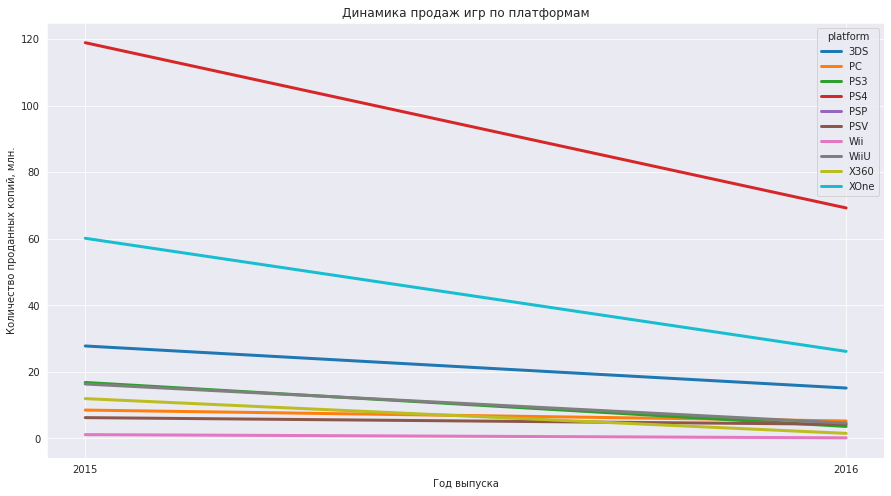

In [94]:
y = games_data_actual.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')

y.plot(kind='line', figsize = (15,8), linewidth=3)
plt.xticks([2015,2016])
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн.')
plt.title('Динамика продаж игр по платформам')
plt.show()

- На графике видны 3 лидера: **Playstation(PS3, PS4), XBox(X360, XOne) и Nintendo(3DS)**, остальные платформы имеют значительно меньшие продажи.

### Глобальные продажи игр в разбивке по платформам

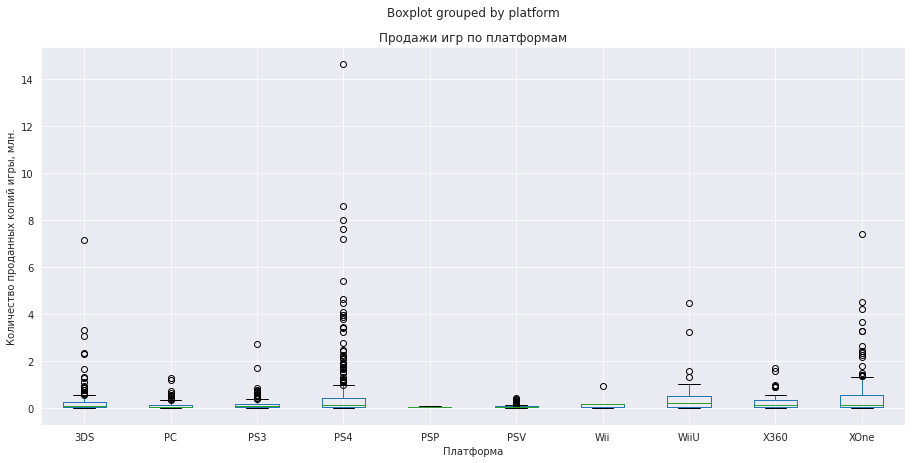

In [95]:
games_data_actual.boxplot(column='total_sales', by='platform', figsize=(15,7))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий игры, млн.')
plt.title('Продажи игр по платформам')
plt.show()

- Рекордные продажи игр более 4 млн.копий имеются только у **Nintendo(3DS), PS4,  WiiU и XOne**. 
- Наибольшее количество игр-хитов у PS4.
- Самая продаваемая игра последних двух лет - **Call of Duty: Black Ops 3 на PS4** (14.6 млн копий)

In [96]:
games_data_actual.groupby('platform')['total_sales'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
XOne,167.0,0.516707,0.965940,0.01,0.035,0.130,0.5550,7.39
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41


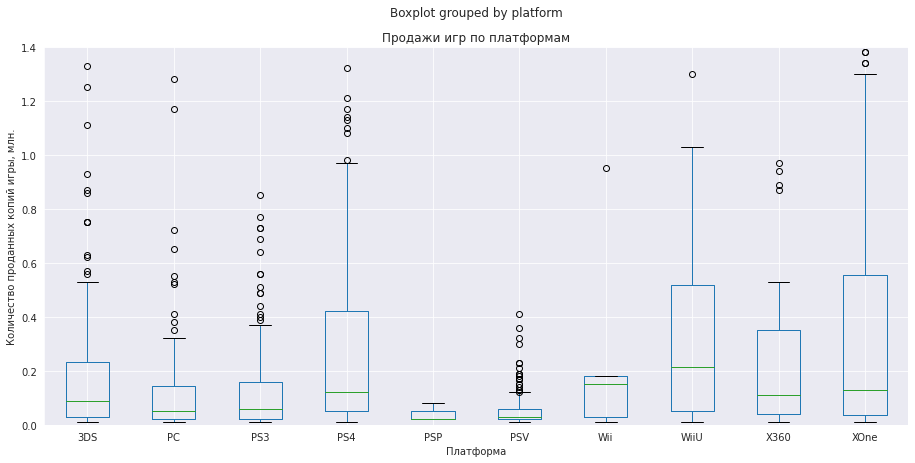

In [97]:
# Отбросим выбросы и рассмотрим нормальные типичные значения  
games_data_actual.boxplot(column='total_sales', by='platform', figsize=(15,7))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий игры, млн.')
plt.title('Продажи игр по платформам')
plt.ylim(0,1.4)
plt.show()

- Медианные продажи среди лидирующих платформ находятся **в диапозоне 0.10 - 0.15 млн. проданных копий**. 
- **Для PS4** нормальные показатели продаваемости копий игр находятся в диапозоне **от 0.05 до 0.42 млн. копий** - все что ниже можно считать слабопродающимися играми, все что выше успешнопродающимися. Игры с выше 1 млн. продаж - большая редкость, это известные игры-хиты.
- **Для XOne** нормальные показатели продаваемости копий игр находятся в диапозоне **от 0.03 до 0.55 млн. копий** - все что ниже можно считать слабопродающимися играми, все что выше успешнопродающимися. Игры с выше 1.3 млн. продаж - большая редкость, это известные игры-хиты.

### Влияние отзывов пользователей и критиков на продажи внутри платформы PS4

In [98]:
#Выбираем данные только для PS4 (как самой популярной и современнной платформы на конец 2016 года)
PS4_score_and_sales = games_data_actual.query('platform == "PS4"')[['critic_score','user_score','total_sales']]

              critic_score  user_score  total_sales
critic_score      1.000000    0.533330     0.392849
user_score        0.533330    1.000000    -0.059738
total_sales       0.392849   -0.059738     1.000000


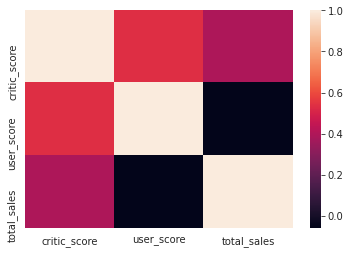

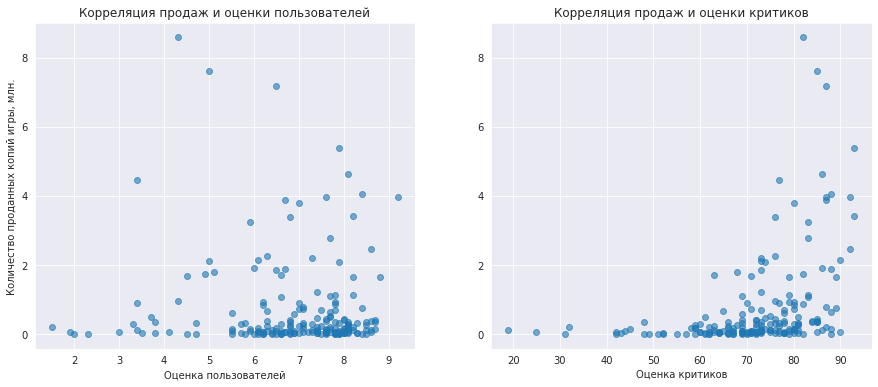

In [99]:
def corr_analysis(data): #составим функцию для построяния графиков корреляции, т.к. она еще пригодится для других платформ
    print(data.corr())
    sns.heatmap(data.corr());
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6)) # строим два графика рядом для наглядности
    #график для оценка пользователей
    ax1.scatter(data=data, x='user_score', y='total_sales', alpha=0.6) 
    ax1.set_title('Корреляция продаж и оценки пользователей')
    ax1.set_xlabel("Оценка пользователей")
    ax1.set_ylabel('Количество проданных копий игры, млн.')
    #график для оценка критиков
    ax2.scatter(data=data, x='critic_score', y='total_sales', alpha=0.6)
    ax2.set_title('Корреляция продаж и оценки критиков')
    ax2.set_xlabel("Оценка критиков")
    plt.show()

corr_analysis(PS4_score_and_sales)  

- **Оценка пользователей не коррелирует с продажами** (коэф. корреляции: -0.06), график так же это подтверждает - распределение стелится по оси X, подавляющая часть игр с высокими оценками от пользователей не превышают 1 млн. проданных копий. При этом имеется значительное количество игр, которые имеют очень высокие продажи (более 2 млн. копий), но оценены пользователями меньше 7 балов из 10.


- **Оценка критиков имеет умеренную положительную корреляцию с продажами** (коэф. коэф. корреляции: 0.4), большинство значений так же стелится по оси Х, но игры с высокими продажами(более 2 млн. копий) имеют более выраженную положительную корреляцию с оценкой критиков. При этом критики не ставят низкие оценки играм с высокими продажами - минимальная оценка для игры с более 2 млн. проданных копий равна около 70 из 100.


- **Пользователи и критики чаще сходятся во мнении** (значительная положительная корреляция 0.53).

#### Проверка схожести тенденций PS4 и всех остальных платформ

              critic_score  user_score  total_sales
critic_score      1.000000    0.426555     0.303243
user_score        0.426555    1.000000     0.017521
total_sales       0.303243    0.017521     1.000000


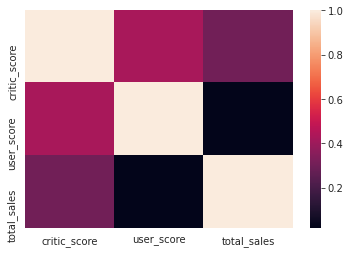

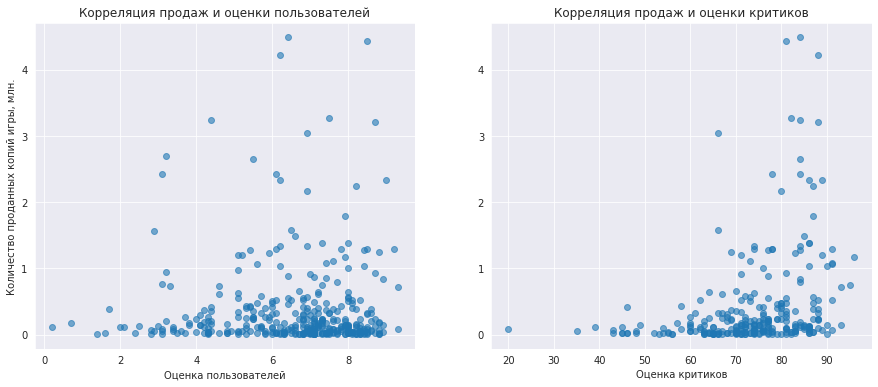

In [100]:
# формируем датасет для всех платформ кроме PS4
others_score_and_sales = games_data_actual.query('platform != "PS4"')[['critic_score','user_score','total_sales']]
# применяем ранее написанную функцию для изучения корреляции
corr_analysis(others_score_and_sales)

- Корреляция между продажами и отзывами **у PS4 и всех остальных платформ имеет схожие тенденции**.
- Подтвердилось полное отсутствие корреляции между продажами и оценками пользователей (коэф 0.017)
- Корреляция между продажами и отзывами критиков также имеется, но немного слабее (коэф. 0.30 вместо 0.40)
- На графиках так же видно, что **пользователи не боятся ставить плохие оценки играм с большими продажами, а критики избегают этого**. В остальном критики и пользователи чаще сходятся во мненнии (коэф. корр. 0.42).

**XOne**

              critic_score  user_score  total_sales
critic_score      1.000000    0.459443     0.430889
user_score        0.459443    1.000000    -0.041467
total_sales       0.430889   -0.041467     1.000000


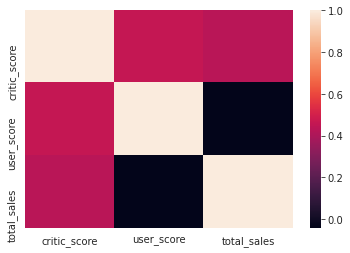

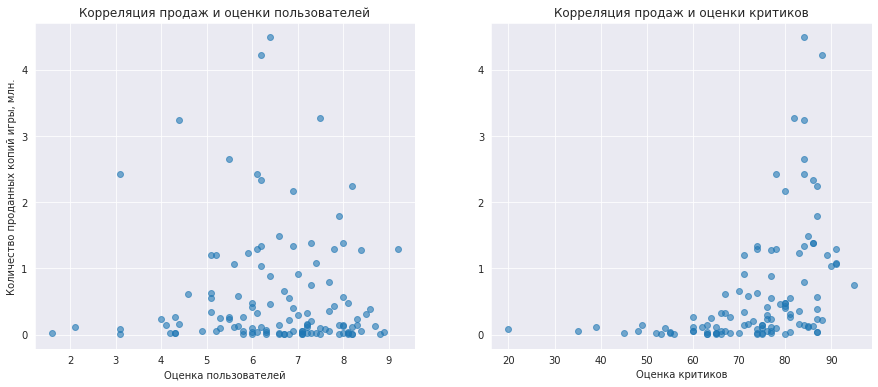

In [101]:
# формируем датасет для платформы №2 - XOne
xone_score_and_sales = games_data_actual.query('platform == "XOne"')[['critic_score','user_score','total_sales']]
# применяем ранее написанную функцию для изучения корреляции
corr_analysis(xone_score_and_sales)

- Корреляция между продажами и отзывами **у XOne и PS4 имеет схожие тенденции**.
- Подтвердилось полное отсутствие корреляции между продажами и оценками пользователей (коэф -0.04)
- Корреляция между продажами и отзывами критиков также имеется (коэф. 0.43 вместо 0.40)
- На графиках так же видно, что **пользователи не боятся ставить плохие оценки играм с большими продажами, а критики избегают этого**. В остальном критики и пользователи чаще сходятся во мненнии (коэф. корр. 0.46).

**Nintendo(3DS)**

              critic_score  user_score  total_sales
critic_score      1.000000    0.791853     0.177575
user_score        0.791853    1.000000     0.198796
total_sales       0.177575    0.198796     1.000000


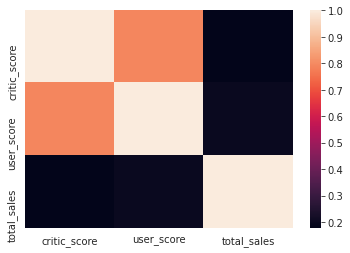

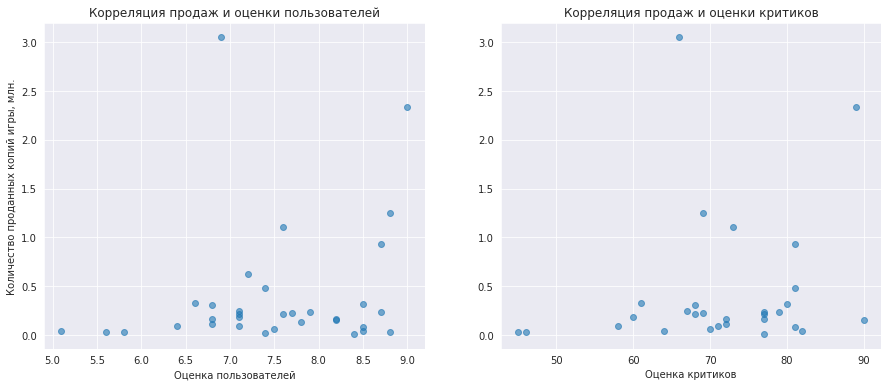

In [102]:
# формируем датасет для платформы №3 - Nintendo(3DS)
ds3_score_and_sales = games_data_actual.query('platform == "3DS"')[['critic_score','user_score','total_sales']]
# применяем ранее написанную функцию для изучения корреляции
corr_analysis(ds3_score_and_sales)

- Корреляция между продажами и отзывами **у Nintendo(3DS) и PS4 имеет разные тенденции**.
- Корреляция между продажами и оценками пользователей у Nintendo(3DS) слабоположительная = 0.2, у PS4 отсутствует = -0.06.
- Корреляция между продажами и отзывами критиков у Nintendo(3DS) ниже (коэф. 0.17 вместо 0.40)
- Оценки пользователей и критиков очень похожи в отличие от PS4 и XOne (коэф.корр. = 0.8).

### Общее распределение игр по жанрам. Самые прибыльные жанры. Жанры с высокими и низкими продажами.

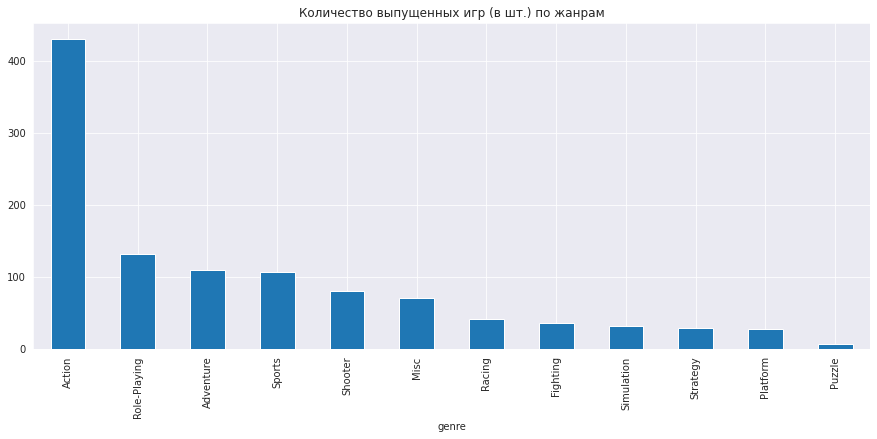

In [103]:
genre_list_1 = games_data_actual.groupby('genre')['name'].count().sort_values(ascending=False)
genre_list_1.plot(kind='bar', figsize=(15,6), title='Количество выпущенных игр (в шт.) по жанрам');

- Наибольшее количество игр, с большим отрывом, выпущенно в жанре Action - 431. На втором месте Role-Playing - 132 тайтла, на третьем Adventure - 110 игры.
- Меньше всего игр выпущено в жанре - Puzzle (7 штук), также аутсайдерами можно назвать жанры Strategy (29 штук), Simulation(33), Platform(28).

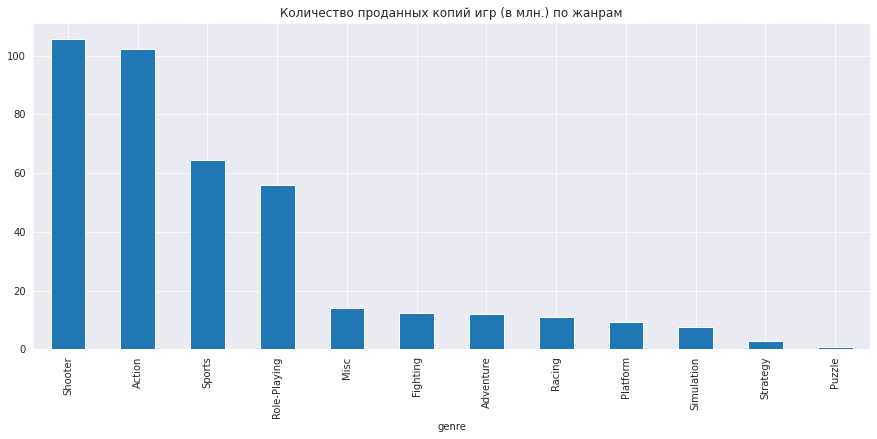

In [104]:
genre_list_2 = games_data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_list_2.plot(kind='bar', figsize=(15,6), title='Количество проданных копий игр (в млн.) по жанрам');

- Наиболее продаваемые игры выпущены в жанре Shooter - 105 млн. проданных копий. Самые популярные представители - Call of Duty, Halo, Battlefield.
- На втором месте жанр Action - 102 млн. проданных копий. Самые популярные представители - Uchartered, Batman, Metal Gear Solid, Assasin's Creed.
- На третьем Sports - около 64 млн. проданных копий. Самые популярные представители - FIFA, NBA, Madden NFL.

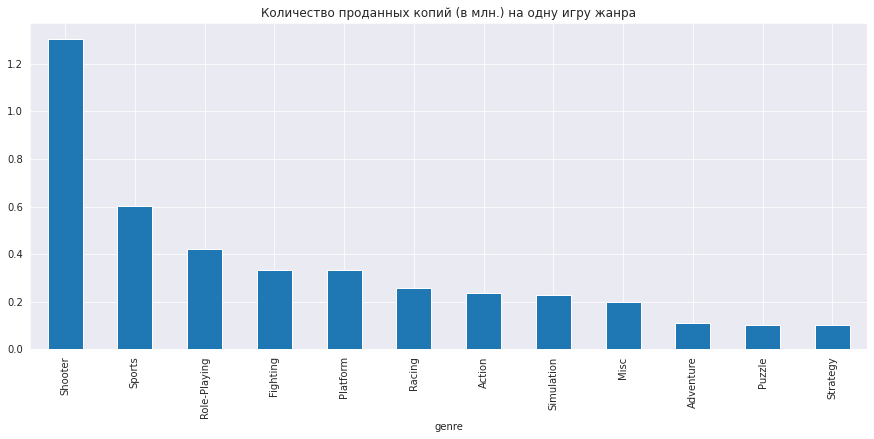

In [105]:
genre_list3 = (genre_list_2 / genre_list_1).sort_values(ascending=False)
genre_list3.plot(kind='bar', figsize=(15,6), title='Количество проданных копий (в млн.) на одну игру жанра');         

- Наилучший показатель имеет жанр Shooter. На одну игру приходится около 1.2 млн. проданных копий. 
- Хорошие показатели наблюдаются у жанра Sports - около 0.6 млн копий на одну игру.
- Хуже всех жанры Strategy  и Puzzle - около 0.1 млн проданных копий на одну игру.

## Портрет пользователя каждого региона

In [106]:
# создадим функцию для сравнения пользовтелей из разных регионов
def user_analysis(by):
    na = games_data_actual.groupby(by)['na_sales'].sum().sort_values(ascending=False).head()
    eu = games_data_actual.groupby(by)['eu_sales'].sum().sort_values(ascending=False).head()
    jp = games_data_actual.groupby(by)['jp_sales'].sum().sort_values(ascending=False).head()

    plt.subplot(1,3,1)
    plt.ylabel('Количество проданных копий игры, млн.')
    na.plot(kind='bar', title='CЕВЕРНАЯ АМЕРИКА')
    plt.subplot(1,3,2)
    eu.plot(kind='bar', title='ЕВРОПА', color='green')
    plt.subplot(1,3,3)
    jp.plot(kind='bar', title='ЯПОНИЯ', figsize=(15,5), color="red")

### Характеристика пользователей разных регионов по ПЛАТФОРМЕ

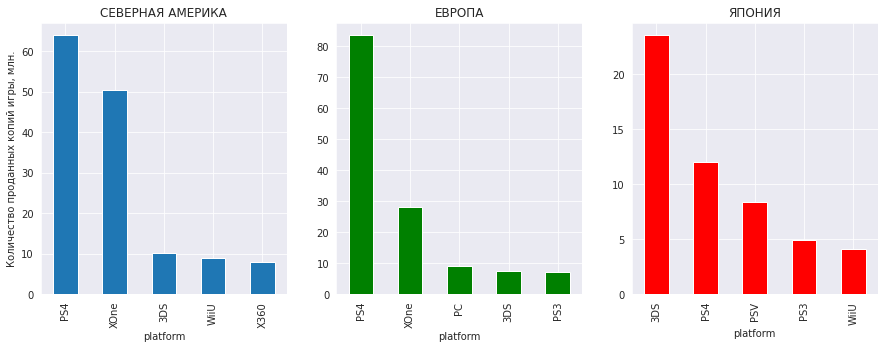

In [107]:
user_analysis('platform')

- Все три региона имеют разные предпочтения в выборе платформы. 
- Америка и Европа довольно похожи - **PlayStation 4 является лидером** в обоих странах, **в Америке более сильные позиции у XBox** т.к. его выпускает американская компания Microsoft, в Европе достатчно сильные позиции у PC(ПК).
- В Японии же совершенно другие предпочтения - **на первом месте с большим отрывом Nintendo(3DS)**, которая в других регионах всегда после Xbox и Playstation. Так же сильные позиции в Японии у Playstation, которую как и Nintendo производит Японская компания. 
- Стоит отметить, что **в Японии совершенно другой игровой менталитет** - портативные игровые устройства гораздо популярнее, нежели домашние приставки. Вероятно поэтому, PlayStation разработала портативную консоль PSV для Японского рынка.

### Характеристика пользователей разных регионов по ЖАНРУ

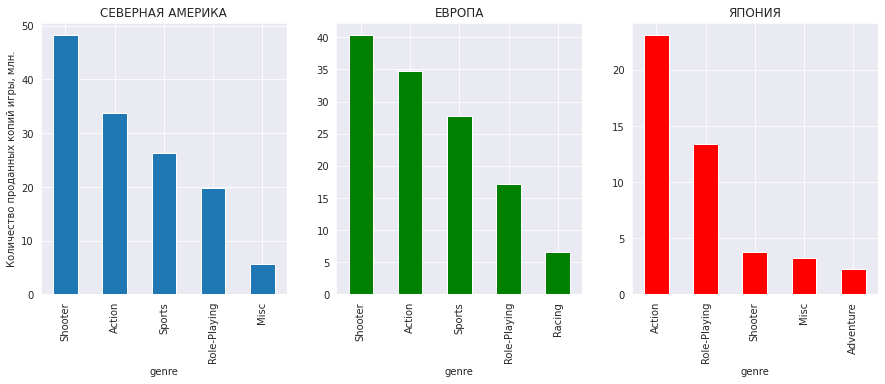

In [108]:
user_analysis('genre')

- Предпочтения по жанрам в Америке и Европе практически одинаковы, небольшое отличие - в Европе больше любят "гонки".
- В Японии другие игровые предпочтения по жанрам - с большим отрывом лидируют жанр жанр Action (благодаря Monster Hunter и Yokai Watch) и Role-Playing (благодаря культовой для Японии серии игр Pokemon).
- Помимо этого в Японии любят шутеры (Splatoon) и игры без определенного жанра (Rhythm Heaven, Minecraft, Mario).
- Данные показывают, что японцы гораздо больше играют в свои отечественные игры, нежели в мировые хиты-бестселлеры от Американских студий.

### Характеристика пользователей разных регионов по ВОЗРАСТНОМУ РЕЙТИНГУ

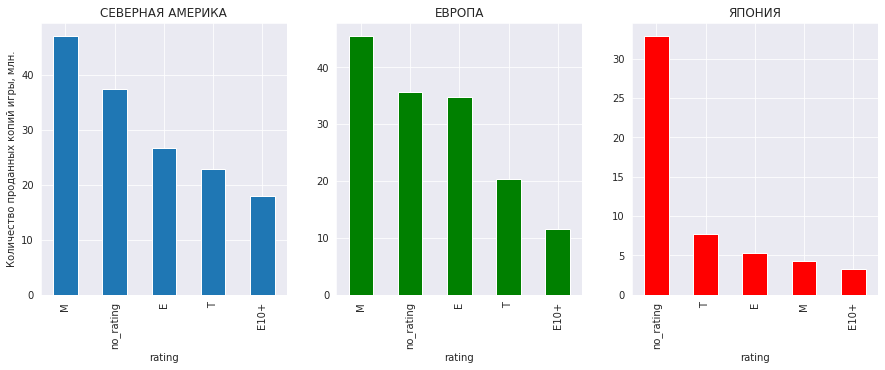

In [109]:
user_analysis('rating')

- Снова предпочтения в Америке и Европе совпадают. Наиболее популярные игры имеют маркировку "М" т.е. игры для взрослых (насилие, кровь, ненормативная лексика, сексуальный контент). Это логично, потому что самые популярные игры  - GTA, Assasin's Creed, The Last of Us и шутеры как раз попадают под эту категорию. На втором месте, с отрывом, игры категории "E" т.е. для всех возрастов.
- В Японии для большиства игр не определен возрастной рейтинг по стандартам ассоциации ESRB. Ассоциация основана в США/Канаде и возможно не занимается оценкой игр разработанных в Японии.
- Самые популярные возрастные категории в Японии - "Е" (для всех) и "Т" (для подростков), игры для взрослых на третьем месте, что в очередной раз подчеркивает, что в Японии совершенно другой игровой менталитет.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [110]:
# подготовка выборки для XOne
xone = games_data_actual.query('platform == "XOne"')['user_score'].dropna()
# размер выборки
xone.count()

121

In [111]:
# подготовка выборки для PC
pc = games_data_actual.query('platform == "PC"')['user_score'].dropna()
# размер выборки
pc.count()

84

**Hулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC **равны**  
xone.mean() = pc.mean() 


**Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC **не равны**    
xone.mean() != pc.mean()

**Уровень значимости** = 0.05 (стандарт)

In [112]:
# т.к. это выборки из двух независимых совокупностей применям метод st.ttest_ind, 
# выборки разного размера поэтому используем параметр equal_var = False
alpha = 0.05
results = st.ttest_ind(xone, pc, equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза не отвергнута, вероятность что средние генеральных совокупностей равны высока')

p-значение:  0.2946308864003345
Нулевая гипотеза не отвергнута, вероятность что средние генеральных совокупностей равны высока


### Средние пользовательские рейтинги жанров Action и Sports разные.

In [113]:
# подготовка выборки для жанра Action
action = games_data_actual.query('genre == "Action"')['user_score'].dropna()
# размер выборки
action.count()

193

In [114]:
# подготовка выборки для жанра Sports
sports = games_data_actual.query('genre == "Sports"')['user_score'].dropna()
# размер выборки
sports.count()

82

**Hулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports **равны**  
action.mean() = sports.mean() 


**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports **не равны**    
action.mean() != sports.mean() 

**Уровень значимости** = 0.05 (стандарт)

In [115]:
# т.к. это выборки из двух независимых совокупностей применям метод st.ttest_ind, 
# выборки разного размера поэтому используем параметр equal_var = False
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза не отвергнута, вероятность что средние генеральных совокупностей равны высока')

p-значение:  5.97163549920592e-10
Нулевая гипотеза отвергнута


## Общий вывод

**Историческая справка и общая информация о продажах игр в период с 1980 по 2016 г.г.:**  


- Наибольшее количество игр было выпущено с 2003 по 2012 годы
- Количество выпускаемых игр до 1995 года составляло меньше 200 в год, а до 2001 меньше 400.
- Пик по количеству выпущенных игр пришелся на 2008, 2009 года - около 1400 игр в год.
- После 2009 года выпуск игр пошел на спад, в 2016 году было выпущено только около 500 игр.
- Самой популярной платформой за весь период можно назвать приставки PlayStation от Sony. До 2000 года главной игровой платформой являлась PlayStation 1(PS), затем ее сменила PS2 и до 2006 года так же удерживала лидерство, с выпуском PS3 в 2006 году - позиции Playstation значительно сократились, но с 2014 года они снова выбиваются в лидеры c выпуском PS4.
- В период с 2006 по 2011 (бум по количеству выпущеннных игр) рынок платформ имел много сильных и относительно равных игроков.

---
**Анализ актуального периода для планирования рекламной компании на 2017 год:**  


Для более краткосрочного планирования и изучения самых последних трендов лучше подойдут данные за последние два года: **2015 и 2016**.

- На рынке преобладают 3 лидера: Playstation(PS3, PS4), XBox(X360, XOne) и Nintendo(3DS), остальные платформы имеют значительно меньшие продажи.
- Наиболее перспективные платформы на 2017 год - PS4 и XOne, т.к. это самые современные платформы (запущены в 2013) и с большой вероятностью будут актуальными еще 3-4 года. Третий лидер Nintendo(3DS) был запущен в 2011 году и скорее всего в ближайщие годы будет заменен более новой моделью (согласно средней продолжительности жизни в 10 лет для топ платформ), поэтому считать его перспективным не стоит.
- Рекордные продажи игр более 4 млн.копий имеются только у PS4, XOne, Nintendo(3DS) и WiiU.
- Для PS4 и XOne нормальные показатели продаваемости игр находятся в диапозоне от 0.03 до 0.55 млн. копий - все что ниже можно считать слабопродающимися играми, все что выше успешнопродающимися. Игры с выше 1 млн. продаж - большая редкость, это известные игры-хиты.


---
**Влияние оценок пользователей и критиков на продажи игр:**
*(Данные для самой популярной современной платформы - PS4.)*


- Оценка пользователей не коррелирует с продажами (коэф. корреляции: -0.06). Подавляющая часть игр с высокими оценками от пользователей не превышают 1 млн. проданных копий. При этом имеется значительное количество игр, которые имеют очень высокие продажи (более 2 млн. копий), но оценены пользователями меньше 7 балов из 10.
- Оценка критиков имеет умеренную положительную корреляцию с продажами (коэф. коэф. корреляции: 0.4). Игры с высокими продажами(более 2 млн. копий) имеют более выраженную положительную корреляцию с оценкой критиков. При этом критики не ставят низкие оценки играм с высокими продажами - минимальная оценка для игры с более 2 млн. проданных копий равна около 70 из 100.
- Пользователи и критики чаще сходятся во мнении (значительная положительная корреляция 0.55).


- Корреляция между продажами и отзывами у PS4 и XOne имеют схожие тенденции.
- Корреляция между продажами и отзывами у Nintendo(3DS) и PS4 имеет разные тенденции. Nintendo(3DS) имеет слабоположительную корреляцию между продажами и оценками пользователей/оценками критиков. Оценки пользователей и критиков очень похожи в отличие от PS4 и XOne (коэф.корр. = 0.8).

---
**Распределение игр по жанрам:**


- Наибольшее количество игр, с большим отрывом, выпущенно в жанре Action - 431. На втором месте Role-Playing - 132 тайтла, на третьем Adventure - 110 игры.
- Меньше всего игр выпущено в жанре - Puzzle (7 штук), также аутсайдерами можно назвать жанры Strategy (29 штук), Simulation(33), Platform(28).


- Наиболее продаваемые игры выпущены в жанре Shooter - 105 млн. проданных копий. Самые популярные представители - Call of Duty, Halo, Battlefield.
- На втором месте жанр Action - 102 млн. проданных копий. Самые популярные представители - Uchartered, Batman, Metal Gear Solid, Assasin's Creed.
- На третьем Sports - около 64 млн. проданных копий. Самые популярные представители - FIFA, NBA, Madden NFL.

---
**Предпочтения пользователей разных регионов (Северная Америка, Европа, Япония)**  

*Предпочтения по платформам:*
- Все три региона имеют разные предпочтения в выборе платформы.
- Америка и Европа довольно похожи - PlayStation 4 является лидером в обоих странах, в Америке более сильные позиции у XBox т.к. его выпускает американская компания Microsoft, в Европе достатчно сильные позиции у PC(ПК).
- В Японии другие предпочтения - на первом месте с большим отрывом Nintendo(3DS), которая в других регионах всегда после Xbox и Playstation. Так же сильные позиции в Японии у Playstation, которую как и Nintendo производит Японская компания.
- Стоит отметить, что в Японии совершенно другой игровой менталитет - портативные игровые устройства гораздо популярнее, нежели домашние приставки. Вероятно поэтому, PlayStation разработала портативную консоль PSV для Японского рынка.

*Предпочтения по жанрам:*
- Предпочтения по жанрам в Америке и Европе практически одинаковы: Shooter, Action, Sports, RPG. Небольшое отличие - в Европе больше любят "гонки".
- В Японии другие игровые предпочтения по жанрам - с большим отрывом лидируют жанр жанр Action (благодаря Monster Hunter и Yokai Watch) и Role-Playing (благодаря культовой для Японии серии игр Pokemon).
- Помимо этого в Японии любят шутеры (Splatoon) и игры без определенного жанра (Rhythm Heaven, Minecraft, Mario).
- Данные показывают, что японцы гораздо больше играют в свои отечественные игры, нежели в мировые хиты-бестселлеры от Американских студий.

*Предпочтения по возрастной категории игр:*
- Снова предпочтения в Америке и Европе совпадают. Наиболее популярные игры имеют маркировку "М" т.е. игры для взрослых (насилие, кровь, ненормативная лексика, сексуальный контент). Это логично, потому что самые популярные игры - шутеры и экшн. На втором месте, с отрывом, игры категории "E" т.е. для всех возрастов.
- В Японии для большиства игр не определен возрастной рейтинг по стандартам ассоциации ESRB. Ассоциация основана в США/Канаде и возможно не занимается оценкой игр разработанных в Японии.
- Самые популярные возрастные категории в Японии - "Е" (для всех) и "Т" (для подростков), игры для взрослых на третьем месте, что в очередной раз подчеркивает, что в Японии совершенно другой игровой менталитет.
---
**Рекомендации по планированию рекламной компании на 2017 год:**


- Учесть популярность платформ и предпочтения в разных регионах - наиболее перспективные PS4, XOne для NA и EU, для Японии портативные приставки Nintendo (возможно следует ожидать новую модель).
- Учесть, что оценки пользователей совершенно не влияют на продажи, а критики избегают ставить плохие оценки играм с высокими продажами. Поэтому можно сделать акцент на играх максимально высоко оцененных критиками, т.к. люди часто принимают решения о покупке из-за экспертного мнения.
- Учесть, что наиболее продаваемые жанры - Shooter, Action, Sports, RPG для NA и EU, для Японии - Action и RPG.
- Учесть, что наиболее частая возрастная возрастная категория игр для NA и EU - "М" (для взрослых). В Японии маркировка по возрасту ESRB не так актуальна. 
- Игроки из Америки и Европы очень похожи по своим предпочтениям и в выборе платформы и в выборе жанров, в Японии совершенно другой игровой менталитет: предпочтение отечественным играм и портативным консолям.